In [2]:
import pathlib
import seaborn as sns
import utils
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake1/sens/insert/'

page_result = utils.get_all_pages(url)

df = utils.to_data_frame(page_result)


In [4]:
df.head()

,entry_id,insert_time,sensor_id,value1,unit1
0,2291.0,2022-03-30T14:49:51.283Z,CIRCUITPY323d,785.0,PPM
1,2304.0,2022-03-30T14:56:37.668Z,CIRCUITPY323d,27.4,C
2,2307.0,2022-03-30T14:57:37.983Z,CIRCUITPY323d,27.4,C
3,2311.0,2022-03-30T14:58:40.293Z,CIRCUITPY323d,31.1,%
4,2328.0,2022-03-30T15:04:41.298Z,CIRCUITPY323d,27.7,C


In [11]:

#convert inser_time to timedate
df['insert_time'] = pd.to_datetime(df['insert_time'])
#and add 2 hours to insert time
df['insert_time'] = df['insert_time'] + pd.Timedelta(hours=2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81228 entries, 0 to 81227
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   entry_id     81228 non-null  float64            
 1   insert_time  81228 non-null  datetime64[ns, UTC]
 2   sensor_id    81228 non-null  object             
 3   value1       81228 non-null  float64            
 4   unit1        81228 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 3.1+ MB


In [12]:
#pivot
df_pivot = df.pivot_table(index='insert_time',columns=['sensor_id','unit1'],values='value1')
#multindex to single index
df_pivot.columns =	df_pivot.columns.map('_'.join)
#resample on 5min time windows

df_pivot = df_pivot.resample('5Min').agg({'CIRCUITPY323d_PPM':'mean', 'CIRCUITPY323d_C':'mean','CIRCUITPY323d_%':'mean','CIRCUITPY323d_%':'mean','CIRCUITPY825a_Window':'last','RASPBERRYPEOPLE_People':'last'})
df_pivot.head(30)


,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,RASPBERRYPEOPLE_People
insert_time,,,,,
2022-03-24 16:00:00+00:00,1069.450000,26.475000,33.500000,0.0,3.0
2022-03-24 16:05:00+00:00,1125.720000,26.400000,34.670000,NaN,NaN
2022-03-24 16:10:00+00:00,1272.466667,26.466667,36.500000,NaN,NaN
2022-03-24 16:15:00+00:00,1440.240000,26.570000,38.030000,NaN,NaN
2022-03-24 16:20:00+00:00,1299.600000,26.670000,35.260000,1.0,NaN
2022-03-24 16:25:00+00:00,723.007692,26.407692,27.007692,0.0,4.0
2022-03-24 16:30:00+00:00,910.083333,26.466667,29.891667,NaN,NaN
2022-03-24 16:35:00+00:00,1150.200000,26.655556,33.211111,1.0,NaN
2022-03-24 16:40:00+00:00,1195.450000,26.750000,32.983333,NaN,3.0


In [13]:
#select specific time window
df_timewindow = df_pivot.loc['2022-04-07 00:00:00':'2022-04-07 23:59:59']

In [14]:
#Fill Nan for window sensor
df_timewindow['CIRCUITPY825a_Window'].fillna(method='ffill',inplace=True)
df_timewindow['CIRCUITPY825a_Window'].fillna(method='bfill',inplace=True)
#Fill Nan for people sensor
df_timewindow['RASPBERRYPEOPLE_People'].fillna(method='ffill',inplace=True)
#Fill Nan for first entry for people sensor
df_timewindow['RASPBERRYPEOPLE_People'].fillna(method='bfill',inplace=True)

df_timewindow.head(5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,RASPBERRYPEOPLE_People
insert_time,,,,,
2022-04-07 00:00:00+00:00,NaN,NaN,NaN,0.0,NaN
2022-04-07 00:05:00+00:00,NaN,NaN,NaN,0.0,NaN
2022-04-07 00:10:00+00:00,NaN,NaN,NaN,0.0,NaN
2022-04-07 00:15:00+00:00,NaN,NaN,NaN,0.0,NaN
2022-04-07 00:20:00+00:00,NaN,NaN,NaN,0.0,NaN


NameError: name 'ax2' is not defined

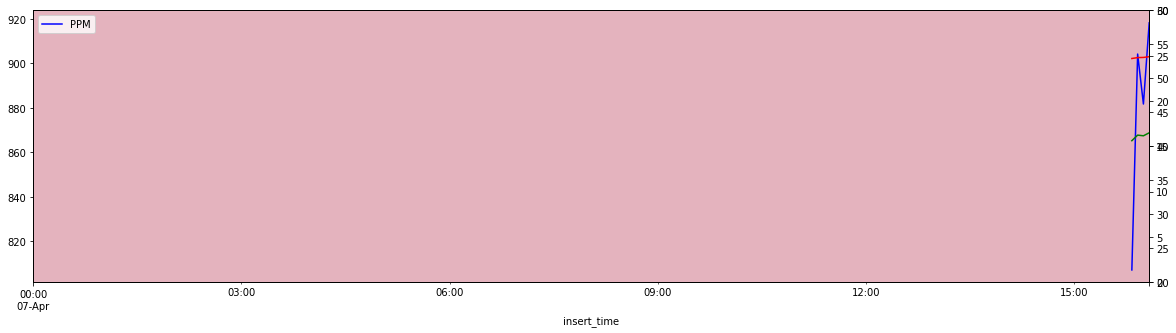

In [15]:
#linechart cobined with bar chart
#if windows sensor 1 blue line if windows sensor 0 red line
# Use a boundary norm instead
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow['CIRCUITPY323d_PPM'].plot(kind='line',color='blue',label='PPM', grid=False)
ax3 = ax1.twinx()
ax3 = df_timewindow['CIRCUITPY323d_C'].plot(kind='line',color='red',label='C', grid=False,ylim=(0,30))
ax4 = ax1.twinx()
ax4 = df_timewindow['CIRCUITPY323d_%'].plot(kind='line',color='green',label='%', grid=False,ylim=(20,60))
#ax2 = ax1.twinx()
#ax2 = df_timewindow['RASPBERRYPEOPLE_People'].plot(kind='line',color='red',label='People Count',ylim=(0,5))
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')
ax4.legend(loc='lower right')
#additonal legend for window sensor


plt.show()

In [80]:
#calculate correleation between two columns
df_timewindow.corr()

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,RASPBERRYPEOPLE_People
CIRCUITPY323d_PPM,1.000000,0.399796,0.579467,0.086809,NaN
CIRCUITPY323d_C,0.399796,1.000000,0.627528,-0.196351,NaN
CIRCUITPY323d_%,0.579467,0.627528,1.000000,0.039130,NaN
CIRCUITPY825a_Window,0.086809,-0.196351,0.039130,1.000000,NaN
RASPBERRYPEOPLE_People,NaN,NaN,NaN,NaN,NaN
